# Assignment 9: Bayesian Analysis

### Conditional Probability 

Q.1. Let's say there are about 8.6 million people living in New-York and about 56 % of them speak Spanish. Let's also assume there are about 7.5 billion people on earth.

If I randomly pick someone living on Earth (an Earthian?), what are the chances that this person is a Spanish speaking New-Yorker?<Br>
<i> 
    <br>Probability of living in New York on Earth, P(NY | E) = 8.6m/7.5b ~ .11%
    <br>Probability of speaking Spanish if living in NY, P(ES | NY) = 56%
    <br>Probability of Spanish Speaking NY on Eartch = P(NY | E) * P(ES | NY) ~ .064%
</i>
    <p>
Q.2 Explain in few terms what is Naive Bayes. What is it considered Naive?<br>
<i>
Naive Bayes is the assumption that probabilities of different events are statisitically independent from each other, that is, that the probability of one happening is not depending on the other happening.  For example, the chances of flipping heads on the 3rd coin flip is presumed independent of the coin flip results from the previous 2. 
</i>
<p>
Q.3 Let's suppose we have a Deck of Cards (52 cards). We pick a card at random. What is the probability of the card we picked being a king, given that it is a face card. <br>
<i> We will define face card as J, Q, K, not A or 2-10.  
    # of face cards = 12 (3 face cards times 4 suits)
    # of Kings = 4
    
    P(K | FC) = 4/12= 1/3
</i>

In [5]:
import numpy as np
import pandas as pd

data = pd.read_csv('shingles.csv')
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1841 entries, 0 to 1840
Data columns (total 6 columns):
Rash                       1841 non-null object
SwollenLymphNode           1841 non-null object
Chills                     1841 non-null object
PolymeraseChainReaction    1841 non-null object
VZVAntibodyTest            1841 non-null object
Blisters                   1841 non-null object
dtypes: object(6)
memory usage: 86.4+ KB
None


,Rash,SwollenLymphNode,Chills,PolymeraseChainReaction,VZVAntibodyTest,Blisters
0,no,no,no,no,pos,no
1,yes,no,no,no,neg,no
2,no,no,no,no,neg,no
3,no,no,no,no,neg,no
4,no,no,no,no,neg,no


Q.4. Does this data contain any missing values?<br>
<i>No values are missing, however, an error is thrown with non numeric values, so remapping</i>

In [6]:
data.isnull().sum()

Rash                       0
SwollenLymphNode           0
Chills                     0
PolymeraseChainReaction    0
VZVAntibodyTest            0
Blisters                   0
dtype: int64

In [7]:
vals = np.array([])
for c in data.columns:
    vals = np.append(vals, data[c].unique())
np.unique(vals)

array(['neg', 'no', 'po', 'pos', 'yes'], dtype=object)

In [8]:
xform = {'neg': 0, 'no': 0, 'po': 1, 'pos': 1, 'yes': 1}

for c in data.columns:
    data[c] = data[c].apply(lambda x: xform[x])

data.head()

,Rash,SwollenLymphNode,Chills,PolymeraseChainReaction,VZVAntibodyTest,Blisters
0,0,0,0,0,1,0
1,1,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0


Q.5. Split the data into 70/30 train test

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_tr, x_te, y_tr, y_te = train_test_split(data.iloc[:,:5], data.iloc[:,-1], test_size = .3, random_state=314)

Q.6. Train a Gaussian Naive Bayes model, a Multinomial Naive Bayes and a Bernoulli Naive Bayes on the dataset. Compute the accuracy for each. Explain your results. <p>
<i>The models all have the same accuracy, however, this is not surprising, given that the preprocessor went and changed everything you binaries.  Bernoulli is a special case of multinomial.  </i>

In [12]:
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [13]:
#Gaussian
gaus_nb = GaussianNB()
gaus_nb.fit(x_tr, y_tr)
print(gaus_nb)

gaus_pr = gaus_nb.predict(x_te)
print(accuracy_score(y_te, gaus_pr))

GaussianNB(priors=None, var_smoothing=1e-09)
0.8318264014466547


In [14]:
# Mutlinomial
mult_nb = MultinomialNB(alpha=.00001)

mult_nb.fit(x_tr, y_tr)
print(mult_nb)

mult_pr = mult_nb.predict(x_te)
print(accuracy_score(y_te, mult_pr))

MultinomialNB(alpha=1e-05, class_prior=None, fit_prior=True)
0.8318264014466547


In [15]:
# Bernoulli
bern_nb = BernoulliNB(binarize=True)
bern_nb.fit(x_tr, y_tr)
print(bern_nb)

bern_pr = bern_nb.predict(x_te)
print(accuracy_score(y_te, bern_pr))

BernoulliNB(alpha=1.0, binarize=True, class_prior=None, fit_prior=True)
0.8318264014466547


## Inference in Bayesian networks

Q.7. Imagine you are at party on Sunday and have an exam on Monday.  If you drink
too much alcolhol at the birthday party, you most likely have problems concentrating the next day, which
would reduce the probability that you pass the exam.  Another consequence of the reduced concentration
might be increased stress with your roommate.

Consider the following random variables that can assume the values "true" or "false":
A:  drinking too much alcolhol on Sunday;
B:  Dairy allergy strikes;
C:  reduced concentration on Monday;
D:  you pass the exam;
E:  stress with your roommates.

a) Draw the corresponding Bayesian network.

In [18]:
%matplotlib inline

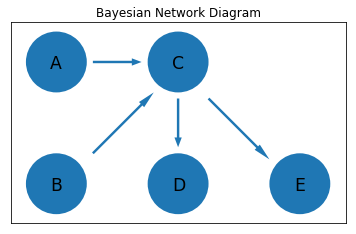

In [91]:
ax = plt.gca()
ax.add_patch(plt.Circle((0,0), radius=2.5))
ax.add_patch(plt.Circle((0,10), radius=2.5))
ax.add_patch(plt.Circle((10,0), radius=2.5))
ax.add_patch(plt.Circle((10,10), radius=2.5))
ax.add_patch(plt.Circle((20,0), radius=2.5))
ax.add_patch(plt.Arrow(3,10,4,0))
ax.add_patch(plt.Arrow(3,2.5,5,5))
ax.add_patch(plt.Arrow(10,7,0,-4))
ax.add_patch(plt.Arrow(12.5,7,5,-5))
#ax.annotate('A', xy=(0,0))
plt.text(-.5,9.5,'A', fontsize='xx-large')
plt.text(-.5,-.5,'B', fontsize='xx-large')
plt.text(9.5,9.5,'C', fontsize='xx-large')
plt.text(9.5,-.5,'D', fontsize='xx-large')
plt.text(19.5,-.5,'E', fontsize='xx-large')
#plt.text(0,25,'Bayesian Network Map', fontsize="xx-large")
plt.title('Bayesian Network Diagram')
plt.xticks(ticks=[])
plt.yticks(ticks=[])

plt.axis('scaled')
plt.show()

b) Search for conditional dependencies and independencies.<p>
<i> Independencies are nodes A and B, with the others all be dependencies.  D is dependent on A and B; D and E are both dependent on C. </i>